In [614]:
#data format
def NemoCfgMongoClient():
    #user = "root"
    #pw   = "bYKH2Utx47Nw4P"
    host = "0.0.0.0"
    port = 27017
    from pymongo import MongoClient
    uri = "mongodb://%s:%s" % (host, port)
    client = MongoClient(uri)
    return client
client = NemoCfgMongoClient()
X = []
Y = []
def in_data_format(doc):
    #float(doc["home_value"]),float(doc["guest_value"]),
    basic_info = [float(doc["home_water"]),float(doc["guest_water"]),float(doc["win_rate"]),float(doc["draw_rate"]),float(doc["lost_rate"])]
    home_team_info = [float(doc["home_last_win"]),float(doc["home_last_draw"]),float(doc["home_last_lost"]),float(doc["home_last_goal"]),float(doc["home_last_gain"])]
    guest_team_info = [float(doc["guest_last_win"]),float(doc["guest_last_draw"]),float(doc["guest_last_lost"]),float(doc["guest_last_goal"]),float(doc["guest_last_gain"])]
    
    basic_info.extend(home_team_info)
    basic_info.extend(guest_team_info)
    return basic_info
def out_data_format(doc):
    result = doc["score"].split(":")
    home_score = int(result[0])
    guest_socre = int(result[1])
    if home_score>guest_socre:
        return 3
    elif home_score==guest_socre:
        return 1
    else:
        return 0
#,{"game_type":{"$in":["美职足","巴甲","阿甲","比甲","英冠","英甲","墨超","瑞超","法乙","俄超","欧罗巴","欧冠","法甲","英超","荷甲","葡超","德乙","荷乙","西甲","意甲","苏超","德甲"]}}    
#"$and":[{"home_value":{"$ne":"0"}},{"guest_value":{"$ne":"0"}}]
for doc in client.data_500wan.detail_games.find({"score":{"$exists":True}}):
    try:
        X.append(in_data_format(doc))
        Y.append(doc)
    except Exception as e:
        print e
        continue
print len(X)
print len(Y)

invalid literal for float(): 94.2%
invalid literal for float(): 94.1%
invalid literal for float(): 93.5%
invalid literal for float(): 93.8%
invalid literal for float(): 94.2%
invalid literal for float(): 93.5%
invalid literal for float(): 93.9%
invalid literal for float(): 94.3%
1915
1915


In [615]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8,random_state=2) #train 80%, test 20%

from  sklearn import preprocessing  
scaler= preprocessing.StandardScaler().fit(X_train) 
X_train=scaler.transform(X_train) 
X_test=scaler.transform(X_test)

In [616]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd',activation='relu', alpha=1e-5,
                    hidden_layer_sizes=(200,100,100), random_state=1)

Y_train_result = [out_data_format(doc) for doc in Y_train]
clf = clf.fit(X_train, Y_train_result)
Y_test_result = [out_data_format(doc) for doc in Y_test]
print( clf.score(X_test, Y_test_result))

0.6318537859007833


1529 1529
1009
max proba = '0.673469387755','1.96102910252'
max proba = '0.612244897959','1.84456762043'
max proba = '0.714285714286','2.04272707027'


TypeError: list indices must be integers, not tuple

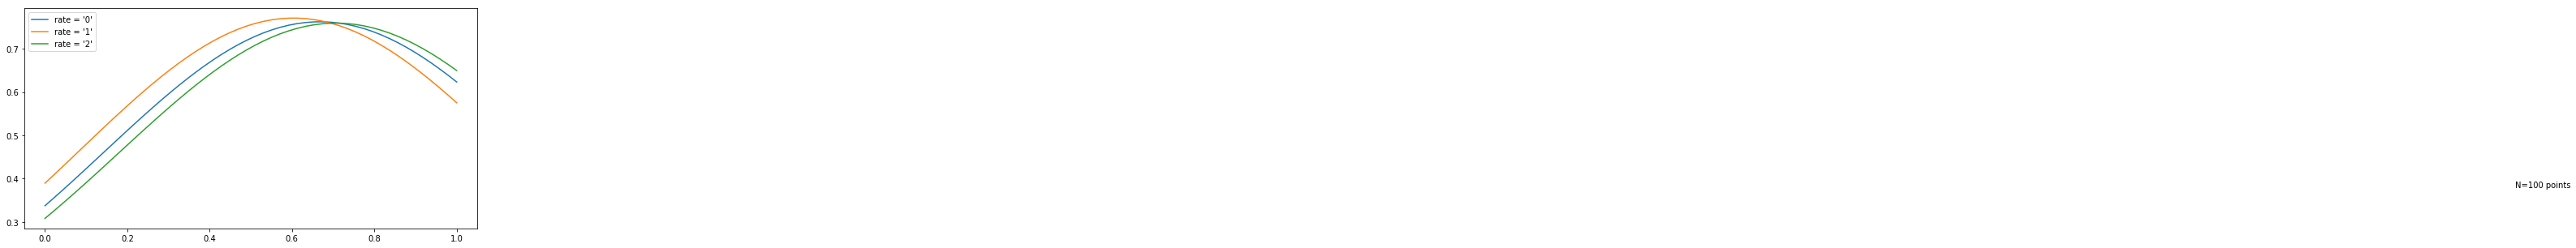

In [581]:
# 概率密度分析
#
#数据初始化
true_proba_0 = []
true_proba_1 = []
true_proba_3 = []
true_proba_max = []
Y_predict = clf.predict(X_train)
print len(Y_predict),len(Y_train_result)
#预测准确
for idx in range(0,len(Y_predict)):
    if Y_predict[idx] == Y_train_result[idx]:
        proba_result = clf.predict_proba([X_train[idx]])
        if Y_predict[idx] == 0:
            true_proba_0.append([max(proba_result[0])])
        elif Y_predict[idx] == 1:
            true_proba_1.append([max(proba_result[0])])
        else:
            true_proba_3.append([max(proba_result[0])])

print len(true_proba_0)+len(true_proba_1)+len(true_proba_3)
import numpy as np
lost_rates = np.array(true_proba_0)
draw_rates = np.array(true_proba_1)
win_rates = np.array(true_proba_3)

#概率密度
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
#----------------------------------------------------------------------
# Plot a 1D density example
X_plot = np.linspace(0, 1, 50)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 5))
'''
for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(win_rates)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))
'''
rates = [lost_rates, draw_rates, win_rates]
for idx in range(0,len(rates)):
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(rates[idx])
    log_dens = kde.score_samples(X_plot)
    max_indx=np.argmax(np.exp(log_dens))
    true_proba_max.append(X_plot[max_indx][0])
    print "max proba = '{0}','{1}'".format(X_plot[max_indx][0],np.exp(X_plot[max_indx][0]))
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="rate = '{0}'".format(idx))
ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(0,1)
ax.set_ylim(0,2)
plt.show()

515
max proba = '0.551020408163','1.73502254606'
max proba = '0.530612244898','1.69997278974'
max proba = '0.591836734694','1.80730490833'


TypeError: list indices must be integers, not tuple

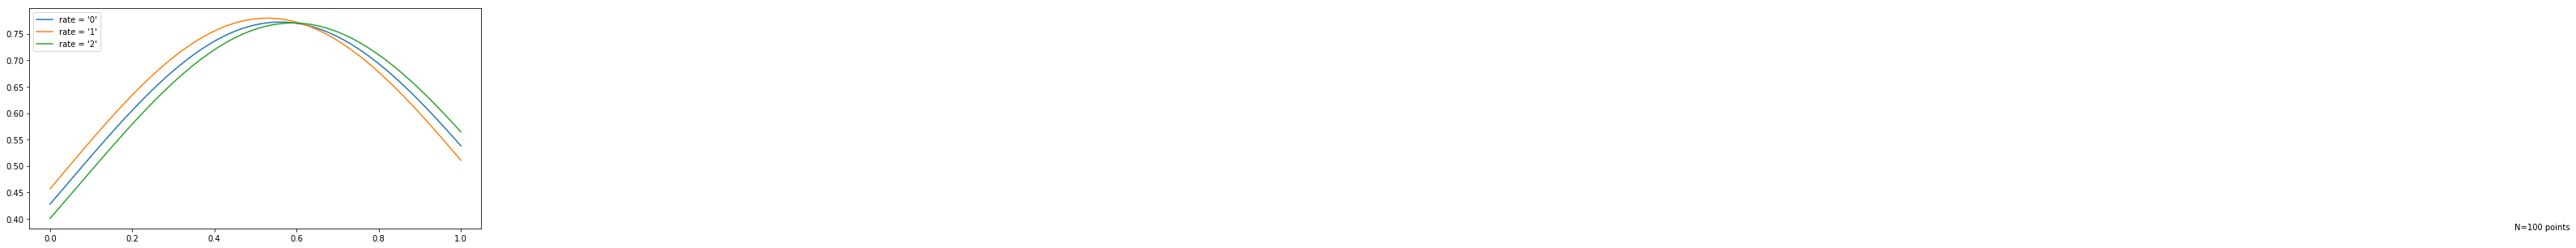

In [617]:
true_proba_0 = []
true_proba_1 = []
true_proba_3 = []
false_proba_max = []
Y_predict = clf.predict(X_train)
#预测错误
for idx in range(0,len(Y_predict)):
    if Y_predict[idx] != Y_train_result[idx]:
        proba_result = clf.predict_proba([X_train[idx]])
        if Y_predict[idx] == 0:
            true_proba_0.append([max(proba_result[0])])
        elif Y_predict[idx] == 1:
            true_proba_1.append([max(proba_result[0])])
        else:
            true_proba_3.append([max(proba_result[0])])
print len(true_proba_0)+len(true_proba_1)+len(true_proba_3)
import numpy as np
lost_rates = np.array(true_proba_0)
draw_rates = np.array(true_proba_1)
win_rates = np.array(true_proba_3)

#概率密度
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
#----------------------------------------------------------------------
# Plot a 1D density example
X_plot = np.linspace(0, 1, 50)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize=(10, 5))
'''
for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(lost_rates)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))
'''
rates = [lost_rates, draw_rates, win_rates]
for idx in range(0,len(rates)):
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(rates[idx])
    log_dens = kde.score_samples(X_plot)
    max_indx=np.argmax(np.exp(log_dens))
    false_proba_max.append(X_plot[max_indx][0])
    print "max proba = '{0}','{1}'".format(X_plot[max_indx][0],np.exp(X_plot[max_indx][0]))
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="rate = '{0}'".format(idx))
ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(0,1)
ax.set_ylim(0,2)
plt.show()

In [647]:
#计算收益
repay_arr = []
total_repay = 0
miss_count = 0
goal_count = 0
def match_result(doc):
    result = doc["score"].split(":")
    home_score = int(result[0])
    guest_socre = int(result[1])
    if home_score>guest_socre:
        return 3
    elif home_score==guest_socre:
        return 1
    else:
        return 0

def expect_cal(proba,rate):
    cal = lambda percent,acurr_rate: percent*(acurr_rate -1) - (1-percent)
    return [cal(proba[i],rate[i]) for i in range(0,len(proba))]

print clf.n_layers_
print clf.n_iter_
print clf.loss_
print clf.out_activation_

print true_proba_max

X_predict = X_test
#,{"game_type":{"$in":["美职足","巴甲","阿甲","比甲","英冠","英甲","墨超","瑞超","法乙","俄超","欧罗巴","欧冠","法甲","英超","荷甲","葡超","德乙","荷乙","西甲","意甲","苏超","德甲"]}
for doc in client.data_500wan.detail_games.find({"score":{"$exists":True},"$and":[{"home_value":{"$ne":"0"}},{"guest_value":{"$ne":"0"}}]}):
    try:
        X_predict.append(in_data_format(doc))
        match_Info.append(doc)
        #X.append(in_data_format(doc))
    except:
        continue

#X_predict=scaler.transform(X_predict)
match_Info=Y_test
print len(X_predict)
print len(match_Info)

def proba_reliability(proba_result):
    max_proba = max(proba_result)
    max_index = proba_result.index(max_proba)
    proba_reliability = true_proba_max[max_index]
    proba_unreliability = false_proba_max[max_index]
    if abs(max_proba-proba_reliability)<0.05 or (max_proba-proba_reliability)>0.15:
        return True
    else:
        return False
general_result = [0,1,3]
for idx in range(0,len(X_predict)):
    try:
        proba_result = clf.predict_proba([X_predict[idx]])
        predict_result = clf.predict([X_predict[idx]])
        doc = match_Info[idx]
        rates = [float(doc["lost_rate"]),float(doc["draw_rate"]),float(doc["win_rate"])]
        if proba_reliability(proba_result[0].tolist()):
            result = match_result(doc)
            if predict_result[0] == result:
                total_repay += (100*rates[general_result.index(result)]-100)
                goal_count+=1
                repay_arr.append(total_repay)
                #show info
                '''
                print "%s:%s"%(doc["home_team"],doc["guest_team"])
                print clf.predict([X_predict[idx]])
                print clf.predict_proba([X_predict[idx]])
                print rates
                '''
            else:
                total_repay -= 100
                miss_count+=1
                repay_arr.append(total_repay)
                '''
                print "%s:%s"%(doc["home_team"],doc["guest_team"])
                print clf.predict([X_predict[idx]])
                print clf.predict_proba([X_predict[idx]])
                print rates
                '''
                
    except Exception as e:
        print e
        continue
print total_repay,goal_count,miss_count,max(repay_arr),min(repay_arr),np.std(repay_arr, ddof = 1)

5
200
0.7690454838938838
softmax
[0.673469387755102, 0.6122448979591836, 0.7142857142857142]
383
383
8498.0 106 35 8598.0 190.0 2467.5579145178117


In [648]:
def expect_cal(proba,rate):
    cal = lambda percent,acurr_rate: percent*(acurr_rate -1) - (1-percent)
    return [cal(proba[i],rate[i]) for i in range(0,len(proba))]

print clf.n_layers_
print clf.n_iter_
print clf.loss_
print clf.out_activation_

print true_proba_max

X_predict = []
match_Info = []
#,{"game_type":{"$in":["美职足","巴甲","阿甲","比甲","英冠","英甲","墨超","瑞超","法乙","俄超","欧罗巴","欧冠","法甲","英超","荷甲","葡超","德乙","荷乙","西甲","意甲","苏超","德甲"]}
for doc in client.data_500wan.detail_games.find({"match_time":{"$regex": '09-15.*'}}):#({"score":{"$exists":False},"$and":[{"home_value":{"$ne":"0"}},{"guest_value":{"$ne":"0"}}]}):
    try:
        X_predict.append(in_data_format(doc))
        match_Info.append(doc)
        #X.append(in_data_format(doc))
    except:
        continue

X_predict=scaler.transform(X_predict)
print len(X_predict)
print len(match_Info)

for idx in range(0,len(X_predict)):
    try:
        proba_result = clf.predict_proba([X_predict[idx]])
        doc = match_Info[idx]
        expect_result = expect_cal(proba_result[0],[float(doc["lost_rate"]),float(doc["draw_rate"]),float(doc["win_rate"])])
        if proba_reliability(proba_result[0].tolist()):
            print "%s:%s"%(doc["home_team"],doc["guest_team"])
            #print doc
            print clf.predict([X_predict[idx]])
            print clf.predict_proba([X_predict[idx]])
            print expect_result
    except Exception as e:
        print e
        continue

5
200
0.7690454838938838
softmax
[0.673469387755102, 0.6122448979591836, 0.7142857142857142]
1
1
韦拉:托卢卡
[0]
[[0.71276052 0.12081064 0.16642884]]
[0.38988301711208073, -0.6013248841528743, -0.3342846510469376]


In [198]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array(X_predict)
X_embedded = TSNE(n_components=2, init='pca', random_state=0).fit_transform(X)

[[  10.324323  122.19594 ]
 [ 119.6102    -22.729753]
 [-106.64878   -16.59655 ]
 [ -81.58428    80.96744 ]]


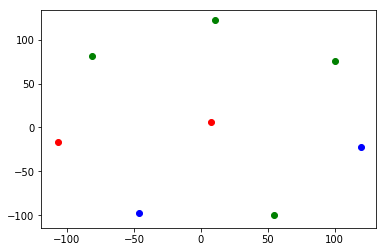

In [199]:
import matplotlib.pyplot as plt
color_list = ['r','b','gray','g']
print X_embedded[:4]
Y_predict = clf.predict(X_predict)
for iter_cnt in range(0,len(X_embedded)):
    color = color_list[Y_predict[iter_cnt]]
    plt.scatter(X_embedded[iter_cnt][0], X_embedded[iter_cnt][1], c=color)
plt.show()

In [364]:
nums = [1, 2, 3, 4, 5, 6, 1, 9]
print nums.index(max(nums))
print nums.index(1)

7
0


255


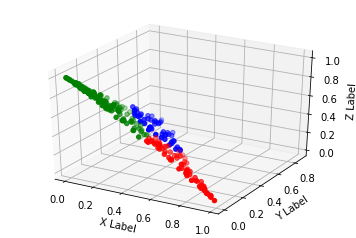

ValueError: Expected 2D array, got 1D array instead:
array=[0.79524682 0.42549052 0.85913784 0.95365807 0.50259531 0.42231756
 0.93072386 0.46724058 0.74214868 0.87615386 0.43516934 0.79810745
 0.6741045  0.53590894 0.78578322 0.4641102  0.51547842 0.74574816
 0.48221557 0.45726918 0.69623413 0.8378447  0.61806786 0.7137697
 0.48892814 0.64166602 0.70749339 0.48168471 0.85788102 0.4771516
 0.69466344 0.70607351 0.85613946 0.52051433 0.62831203 0.51509572
 0.62454442 0.68992748 0.46680229 0.86526591 0.57952082 0.4524491
 0.56695289 0.52039548 0.62765039 0.75818535 0.91819095 0.4485199
 0.81249894 0.38265631 0.98317728 0.82939709 0.53691807 0.52917253
 0.58181056 0.60395883 0.7386179  0.44387548 0.88165173 0.53084247
 0.58873503 0.70706994 0.49115928 0.89104246 0.45770378 0.92083508
 0.91747846 0.93850365 0.45765302 0.63246719 0.54588085 0.70179862
 0.93502884 0.47116637 0.76965356].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [417]:
true_proba_0 = []
true_proba_1 = []
true_proba_3 = []
Y_predict = clf.predict(X_test)
#预测准确
for idx in range(0,len(Y_predict)):
    if Y_predict[idx] == Y_test[idx]:
        proba_result = clf.predict_proba([X_test[idx]])
        if Y_predict[idx] == 0:
            true_proba_0.append(proba_result[0])
        elif Y_predict[idx] == 1:
            true_proba_1.append(proba_result[0])
        else:
            true_proba_3.append(proba_result[0])

print len(true_proba_0)+len(true_proba_1)+len(true_proba_3)
import numpy as np
lost_rates = np.array(true_proba_0)
draw_rates = np.array(true_proba_1)
win_rates = np.array(true_proba_3)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color_list = ['r','b','g']
ax.scatter(lost_rates[:,0], lost_rates[:,1], lost_rates[:,2], c='r')
ax.scatter(draw_rates[:,0], draw_rates[:,1], draw_rates[:,2], c='b')
ax.scatter(win_rates[:,0], win_rates[:,1], win_rates[:,2], c='g')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

kde = KernelDensity(kernel=kernel, bandwidth=1.0).fit(lost_rates[:,0]) 
dens = kde.score_samples(X_plot)
    

124


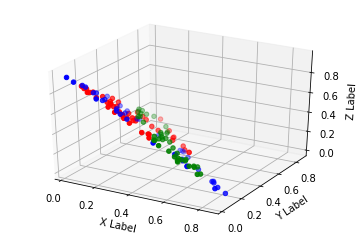

In [332]:
true_proba_0 = []
true_proba_1 = []
true_proba_3 = []
Y_predict = clf.predict(X_test)
#预测错误
for idx in range(0,len(Y_predict)):
    if Y_predict[idx] != Y_test[idx]:
        proba_result = clf.predict_proba([X_test[idx]])
        if Y_test[idx] == 0:
            true_proba_0.append(proba_result[0])
        elif Y_test[idx] == 1:
            true_proba_1.append(proba_result[0])
        else:
            true_proba_3.append(proba_result[0])
print len(true_proba_0)+len(true_proba_1)+len(true_proba_3)
import numpy as np
lost_rates = np.array(true_proba_0)
draw_rates = np.array(true_proba_1)
win_rates = np.array(true_proba_3)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color_list = ['r','b','g']
ax.scatter(lost_rates[:,0], lost_rates[:,1], lost_rates[:,2], c='r')
ax.scatter(draw_rates[:,0], draw_rates[:,1], draw_rates[:,2], c='b')
ax.scatter(win_rates[:,0], win_rates[:,1], win_rates[:,2], c='g')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

355


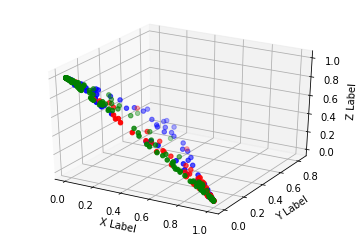

In [258]:
true_proba_0 = []
true_proba_1 = []
true_proba_3 = []
Y_predict = clf.predict(X_test)

for idx in range(0,len(Y_predict)):
    proba_result = clf.predict_proba([X_test[idx]])
    if Y_test[idx] == 0:
        true_proba_0.append(proba_result[0])
    elif Y_test[idx] == 1:
        true_proba_1.append(proba_result[0])
    else:
        true_proba_3.append(proba_result[0])

print len(true_proba_0)+len(true_proba_1)+len(true_proba_3)
import numpy as np
lost_rates = np.array(true_proba_0)
draw_rates = np.array(true_proba_1)
win_rates = np.array(true_proba_3)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color_list = ['r','b','g']
ax.scatter(lost_rates[:,0], lost_rates[:,1], lost_rates[:,2], c='r')
ax.scatter(draw_rates[:,0], draw_rates[:,1], draw_rates[:,2], c='b')
ax.scatter(win_rates[:,0], win_rates[:,1], win_rates[:,2], c='g')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
